<a href="https://colab.research.google.com/github/yakaralar/IE492/blob/master/naive_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
import glob
import shutil
os.listdir()

['.config', 'drive', 'sample_data']

In [0]:
shutil.copy("drive/My Drive/colab_datas/IE 492/weather_turkey_processed.zip","./")
# !unzip weather_turkey_processed.zip

In [13]:
shutil.copy("drive/My Drive/colab_datas/IE 492/RealTimeConsumption-01122014-09032020.csv","./")
shutil.copy("drive/My Drive/colab_datas/IE 492/RealTimeConsumption_holiday.csv","./")
shutil.copy("drive/My Drive/colab_datas/IE 492/RealTimeConsumption_unholidayized.csv","./")

'./RealTimeConsumption_unholidayized.csv'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline
from tqdm import tqdm_notebook as tqdm

In [15]:
weather_paths=glob.glob("weather_turkey_processed/*.csv")
np.random.choice(weather_paths,10)

array(['weather_turkey_processed/37_29.5.csv',
       'weather_turkey_processed/36_44.5.csv',
       'weather_turkey_processed/36.5_32.5.csv',
       'weather_turkey_processed/37_28.5.csv',
       'weather_turkey_processed/36.5_42.5.csv',
       'weather_turkey_processed/37_31.5.csv',
       'weather_turkey_processed/36.5_26.csv',
       'weather_turkey_processed/36_30.csv',
       'weather_turkey_processed/36.5_26.5.csv',
       'weather_turkey_processed/37_34.5.csv'], dtype='<U38')

In [0]:
# weather_turkey=pd.DataFrame()
# for path in tqdm(weather_paths):
#     df=pd.read_csv(path)
#     weather_turkey=pd.concat([weather_turkey,df]).reset_index(drop=True)
# weather_turkey

In [0]:
# weather_turkey.to_feather("drive/My Drive/colab_datas/IE 492/all_data.feather") 

# Consumption df

In [18]:
# bruuuuuuuh
cons_unholidayized=pd.read_csv("RealTimeConsumption_unholidayized.csv",encoding='latin-1')
cons_unholidayized.columns=["Date","Hour","Consumption"]+cons_unholidayized.columns.tolist()[3:]
cons_unholidayized["Datetime"]=cons_unholidayized["Date"]+" "+cons_unholidayized["Hour"]
cons_unholidayized["Datetime"]=pd.to_datetime(cons_unholidayized["Datetime"],format="%d.%m.%Y %H:%M")
cons_unholidayized.head(5)

,Date,Hour,Consumption,Datetime,is_annelergunu,is_arife,is_babalargunu,is_cocukbayrami,is_cumhuriyet,is_elections,is_examination,is_genclikbayrami,is_holiday,is_iscibayrami,is_kadinlargunu,is_kandil,is_kurbanbayrami,is_kurbanbayramilkgun,is_kurbanoncesigunler,is_onbestemmuz,is_outlierdays,is_ramazanbayrami,is_ramazanbayramilkgun,is_ramazanbayramisonrasi,is_ramazangunler,is_ramazanilkgun,is_ramazanoncesigunler,is_school_days,is_school_end,is_school_start,is_semester,is_semester_days,is_sevgililergunu,is_single_day_holidays,is_summerTimes,is_summer_break,is_uzunbayram,is_winterTimes,is_winter_break,is_winter_break_schools,is_yilbasi,is_yilbasioncesi,is_zaferbayrami
0,31.12.2015,00:00,29745.882083,2015-12-31 00:00:00,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-193.25695,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,38.254867,0.0
1,31.12.2015,01:00,27940.432083,2015-12-31 01:00:00,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-193.25695,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,38.254867,0.0
2,31.12.2015,02:00,26671.532083,2015-12-31 02:00:00,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-193.25695,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,38.254867,0.0
3,31.12.2015,03:00,26246.622083,2015-12-31 03:00:00,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-193.25695,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,38.254867,0.0
4,31.12.2015,04:00,26026.542083,2015-12-31 04:00:00,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-193.25695,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,38.254867,0.0


In [19]:
# bruuuuuuuh
cons_holiday_binary=pd.read_csv("RealTimeConsumption_holiday.csv",encoding='latin-1')
cons_holiday_binary["Datetime"]=cons_holiday_binary["Date"]+" "+cons_holiday_binary["Hour"]
cons_holiday_binary["Datetime"]=pd.to_datetime(cons_holiday_binary["Datetime"],format="%d.%m.%Y %H:%M")
cons_holiday_binary.head()

,Date,Hour,Consumption,Datetime,is_annelergunu,is_arife,is_babalargunu,is_cocukbayrami,is_cumhuriyet,is_elections,is_examination,is_genclikbayrami,is_holiday,is_iscibayrami,is_kadinlargunu,is_kandil,is_kurbanbayrami,is_kurbanbayramilkgun,is_kurbanoncesigunler,is_onbestemmuz,is_outlierdays,is_ramazanbayrami,is_ramazanbayramilkgun,is_ramazanbayramisonrasi,is_ramazangunler,is_ramazanilkgun,is_ramazanoncesigunler,is_school_days,is_school_end,is_school_start,is_semester,is_semester_days,is_sevgililergunu,is_single_day_holidays,is_summerTimes,is_summer_break,is_uzunbayram,is_winterTimes,is_winter_break,is_winter_break_schools,is_yilbasi,is_yilbasioncesi,is_zaferbayrami
0,31.12.2015,00:00,29590.88,2015-12-31 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31.12.2015,01:00,27785.43,2015-12-31 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,31.12.2015,02:00,26516.53,2015-12-31 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,31.12.2015,03:00,26091.62,2015-12-31 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,31.12.2015,04:00,25871.54,2015-12-31 04:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Evaluation function

In [26]:
!pip install graphviz
!pip install sklearn --upgrade
from sklearn.metrics import mean_squared_error,mean_squared_log_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor,plot_tree

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

eval_df=[]
def eval_function(name_,y_true, y_pred):
    """
    docstring denir buraya func paramlarının neler oldugunu yazarsınız
    name_:kullanılan modelin ismi
    y_true:actual values
    y_pred:predicted values
    valid_df:modele verdiginiz sekliyle validation dataframe'i ve yanına datetime'ı
    """
    rmse_=np.sqrt(mean_squared_error(y_true,y_pred))
    rmsle_=np.sqrt(mean_squared_log_error(y_true,y_pred))
    mae_=mean_absolute_error(y_true,y_pred)
    mape_=mean_absolute_percentage_error(y_true, y_pred)

    print("RMSE: ",rmse_)
    print("RMSLE: ",rmsle_)
    print("MAE: ",mae_)
    print("MAPE: ",mape_)
    plt.figure(figsize=(16,10))
    sns.scatterplot(x=y_pred,y=y_true)
    plt.pause(0.01)
    plt.figure(figsize=(16,10))
    sns.residplot(y_true,y_pred)
    plt.pause(0.01)
    # nchunks=6 # plot count
    # fig,ax=plt.subplots(nrows=nchunks,figsize=(32,25))
    # valid_copy=valid_df.reset_index(drop=True).copy()
    # for i,datetime_ in enumerate(np.array_split(valid_copy["Datetime"],nchunks)):
    #     sns.lineplot(y=y_true[datetime_.index.tolist()],x=datetime_,color="green",ax=ax[i])
    #     sns.lineplot(y=y_pred[datetime_.index.tolist()],x=datetime_,color="red",ax=ax[i])
    # plt.pause(0.01)
    # res_model=DecisionTreeRegressor(max_depth=4)
    # _, ax = plt.subplots(figsize=(60, 60))  # whatever size you want
    # fig=res_model.fit(valid_df.drop(columns=["Datetime"]),y_true-y_pred)
    # plot_tree(fig,ax=ax,feature_names=valid_df.drop(columns=["Datetime"]).columns,fontsize=16)
    # plt.pause(0.01)
    # ## saatlik mape tanımla
    return name_, rmse_,rmsle_,mae_,mape_

Requirement already up-to-date: sklearn in /usr/local/lib/python3.6/dist-packages (0.0)


# Naive Approach 2 Days

In [0]:
cons_lagged=cons_holiday_binary.copy()

In [53]:
cons_lagged["Consumption_2_lag"]=cons_lagged["Consumption"].shift(24*2)
cons_lagged=cons_lagged.dropna()
cons_lagged

,Date,Hour,Consumption,Datetime,is_annelergunu,is_arife,is_babalargunu,is_cocukbayrami,is_cumhuriyet,is_elections,is_examination,is_genclikbayrami,is_holiday,is_iscibayrami,is_kadinlargunu,is_kandil,is_kurbanbayrami,is_kurbanbayramilkgun,is_kurbanoncesigunler,is_onbestemmuz,is_outlierdays,is_ramazanbayrami,is_ramazanbayramilkgun,is_ramazanbayramisonrasi,is_ramazangunler,is_ramazanilkgun,is_ramazanoncesigunler,is_school_days,is_school_end,is_school_start,is_semester,is_semester_days,is_sevgililergunu,is_single_day_holidays,is_summerTimes,is_summer_break,is_uzunbayram,is_winterTimes,is_winter_break,is_winter_break_schools,is_yilbasi,is_yilbasioncesi,is_zaferbayrami,Consumption_2_lag
48,02.01.2016,00:00,26224.60,2016-01-02 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29590.88
49,02.01.2016,01:00,24708.58,2016-01-02 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27785.43
50,02.01.2016,02:00,23771.58,2016-01-02 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26516.53
51,02.01.2016,03:00,22921.29,2016-01-02 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26091.62
52,02.01.2016,04:00,22870.89,2016-01-02 04:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25871.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36571,03.03.2020,19:00,37936.79,2020-03-03 19:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,35049.21
36572,03.03.2020,20:00,37553.37,2020-03-03 20:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34901.84
36573,03.03.2020,21:00,36581.73,2020-03-03 21:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34225.14
36574,03.03.2020,22:00,35434.36,2020-03-03 22:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,33257.06


RMSE:  3742.435123928614
RMSLE:  0.11531796204990606
MAE:  2631.863357472712
MAPE:  8.15891679451567


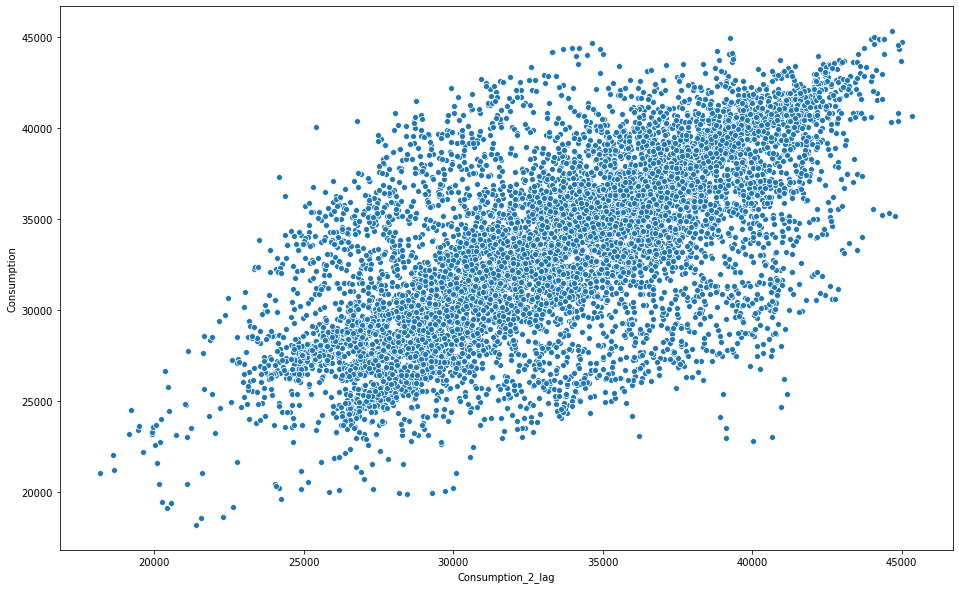

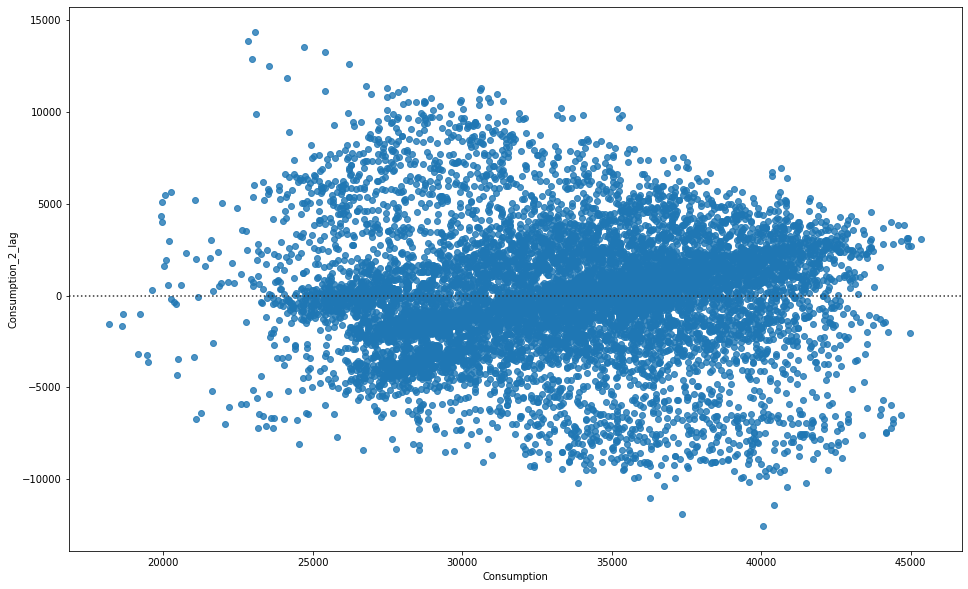

In [54]:
cons_lagged=cons_lagged.loc[cons_lagged["Datetime"]>=pd.to_datetime("2019-02-01 00:00:00")]
eval_df.append(eval_function("naive_2",cons_lagged["Consumption"],cons_lagged["Consumption_2_lag"]))

# Naive Approach 1 Week

In [0]:
cons_lagged=cons_holiday_binary.copy()

In [50]:
cons_lagged["Consumption_7_lag"]=cons_lagged["Consumption"].shift(24*7)
cons_lagged=cons_lagged.dropna()
cons_lagged

,Date,Hour,Consumption,Datetime,is_annelergunu,is_arife,is_babalargunu,is_cocukbayrami,is_cumhuriyet,is_elections,is_examination,is_genclikbayrami,is_holiday,is_iscibayrami,is_kadinlargunu,is_kandil,is_kurbanbayrami,is_kurbanbayramilkgun,is_kurbanoncesigunler,is_onbestemmuz,is_outlierdays,is_ramazanbayrami,is_ramazanbayramilkgun,is_ramazanbayramisonrasi,is_ramazangunler,is_ramazanilkgun,is_ramazanoncesigunler,is_school_days,is_school_end,is_school_start,is_semester,is_semester_days,is_sevgililergunu,is_single_day_holidays,is_summerTimes,is_summer_break,is_uzunbayram,is_winterTimes,is_winter_break,is_winter_break_schools,is_yilbasi,is_yilbasioncesi,is_zaferbayrami,Consumption_7_lag
168,07.01.2016,00:00,28763.95,2016-01-07 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29590.88
169,07.01.2016,01:00,27284.84,2016-01-07 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27785.43
170,07.01.2016,02:00,26321.95,2016-01-07 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26516.53
171,07.01.2016,03:00,25748.49,2016-01-07 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26091.62
172,07.01.2016,04:00,25636.58,2016-01-07 04:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25871.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36571,03.03.2020,19:00,37936.79,2020-03-03 19:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,39283.70
36572,03.03.2020,20:00,37553.37,2020-03-03 20:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,38791.40
36573,03.03.2020,21:00,36581.73,2020-03-03 21:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,37588.86
36574,03.03.2020,22:00,35434.36,2020-03-03 22:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36290.64


RMSE:  2785.6676720824325
RMSLE:  0.08866365662808862
MAE:  1689.9428799328296
MAPE:  5.208054715113828


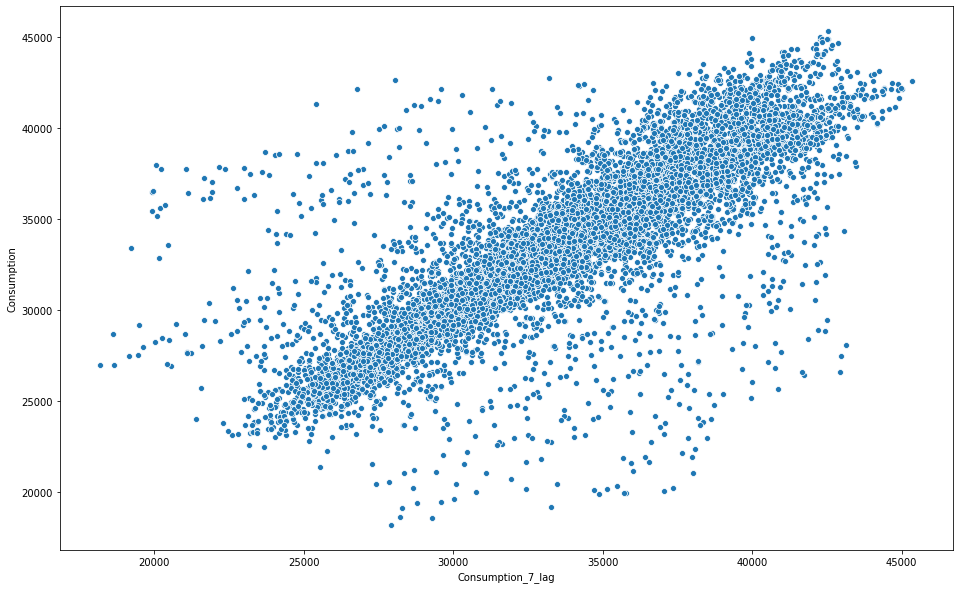

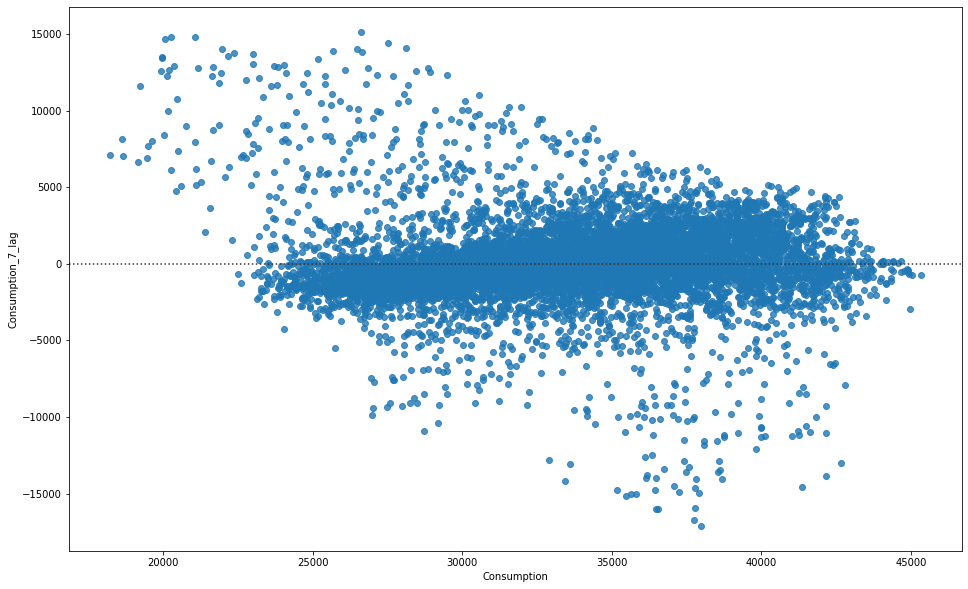

In [51]:
cons_lagged=cons_lagged.loc[cons_lagged["Datetime"]>=pd.to_datetime("2019-02-01 00:00:00")]
eval_df.append(eval_function("naive_7",cons_lagged["Consumption"],cons_lagged["Consumption_7_lag"]))

# Linear Regression

## Regression with 2 days lag

In [0]:
cons_lagged=cons_holiday_binary.copy()

In [33]:
cons_lagged["Consumption_2_lag"]=cons_lagged["Consumption"].shift(24*2)
cons_lagged=cons_lagged.dropna()
cons_lagged

,Date,Hour,Consumption,Datetime,is_annelergunu,is_arife,is_babalargunu,is_cocukbayrami,is_cumhuriyet,is_elections,is_examination,is_genclikbayrami,is_holiday,is_iscibayrami,is_kadinlargunu,is_kandil,is_kurbanbayrami,is_kurbanbayramilkgun,is_kurbanoncesigunler,is_onbestemmuz,is_outlierdays,is_ramazanbayrami,is_ramazanbayramilkgun,is_ramazanbayramisonrasi,is_ramazangunler,is_ramazanilkgun,is_ramazanoncesigunler,is_school_days,is_school_end,is_school_start,is_semester,is_semester_days,is_sevgililergunu,is_single_day_holidays,is_summerTimes,is_summer_break,is_uzunbayram,is_winterTimes,is_winter_break,is_winter_break_schools,is_yilbasi,is_yilbasioncesi,is_zaferbayrami,Consumption_2_lag
48,02.01.2016,00:00,26224.60,2016-01-02 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29590.88
49,02.01.2016,01:00,24708.58,2016-01-02 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27785.43
50,02.01.2016,02:00,23771.58,2016-01-02 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26516.53
51,02.01.2016,03:00,22921.29,2016-01-02 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26091.62
52,02.01.2016,04:00,22870.89,2016-01-02 04:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25871.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36571,03.03.2020,19:00,37936.79,2020-03-03 19:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,35049.21
36572,03.03.2020,20:00,37553.37,2020-03-03 20:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34901.84
36573,03.03.2020,21:00,36581.73,2020-03-03 21:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34225.14
36574,03.03.2020,22:00,35434.36,2020-03-03 22:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,33257.06


In [0]:
train_df=cons_lagged.loc[cons_lagged["Datetime"]<pd.to_datetime("2019-02-01 00:00:00")]
valid_df=cons_lagged.loc[cons_lagged["Datetime"]>=pd.to_datetime("2019-02-01 00:00:00")]

In [35]:
from sklearn.linear_model import LinearRegression

cons_lagged["Consumption_2_lag"]=cons_lagged["Consumption"].shift(24*2)
cons_lagged=cons_lagged.dropna()

model=LinearRegression()
model.fit(train_df["Consumption_2_lag"].values.reshape(-1, 1),train_df["Consumption"].values.reshape(-1, 1))
preds=model.predict(valid_df["Consumption_2_lag"].values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


RMSE:  3449.5866807882403
RMSLE:  0.1060036013206916
MAE:  2550.6877943091963
MAPE:  7.855694573000102


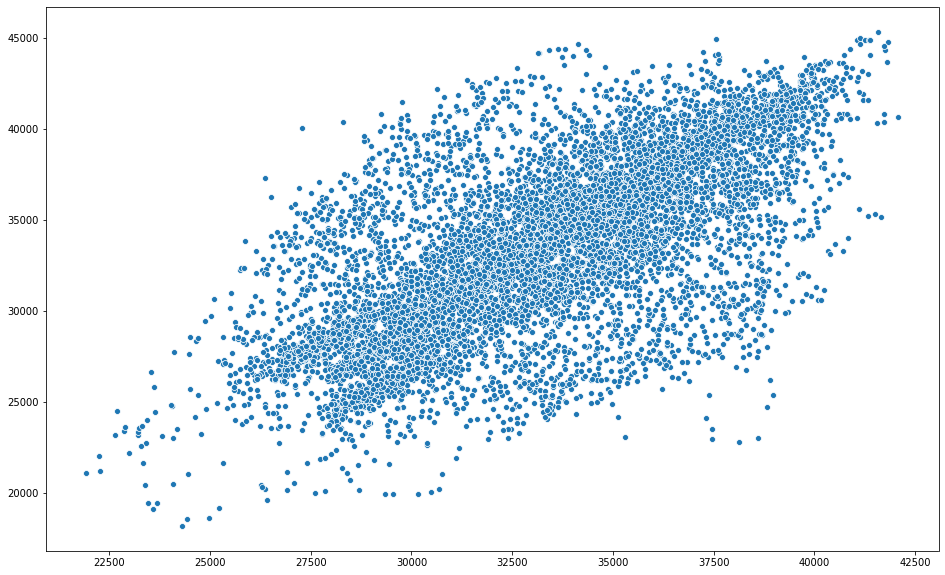

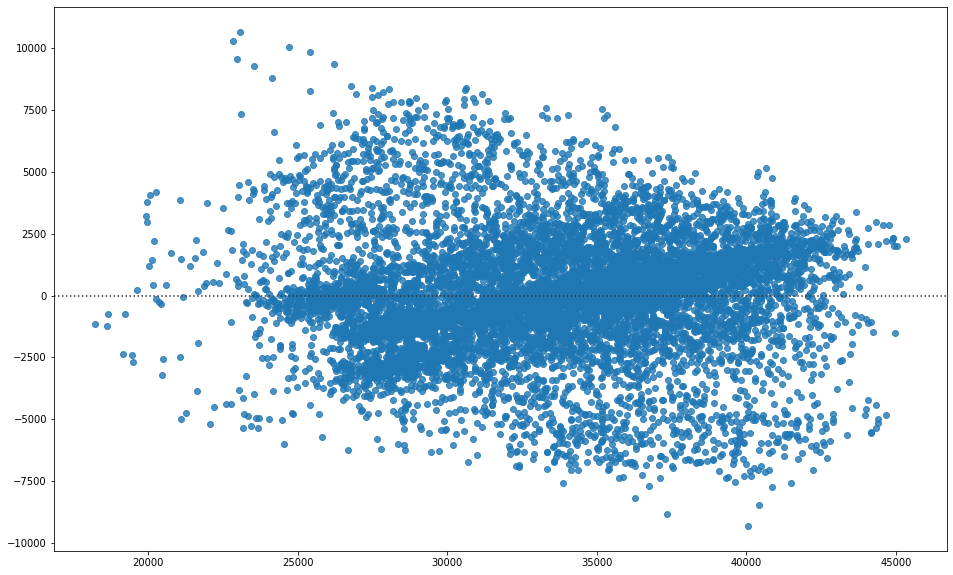

In [43]:
eval_df.append(eval_function("LR_2",valid_df["Consumption"].values,preds.reshape(1,-1)[0]))

## Regression with 7 days lag

In [0]:
cons_lagged=cons_holiday_binary.copy()

In [45]:
cons_lagged["Consumption_7_lag"]=cons_lagged["Consumption"].shift(24*7)
cons_lagged=cons_lagged.dropna()
cons_lagged

,Date,Hour,Consumption,Datetime,is_annelergunu,is_arife,is_babalargunu,is_cocukbayrami,is_cumhuriyet,is_elections,is_examination,is_genclikbayrami,is_holiday,is_iscibayrami,is_kadinlargunu,is_kandil,is_kurbanbayrami,is_kurbanbayramilkgun,is_kurbanoncesigunler,is_onbestemmuz,is_outlierdays,is_ramazanbayrami,is_ramazanbayramilkgun,is_ramazanbayramisonrasi,is_ramazangunler,is_ramazanilkgun,is_ramazanoncesigunler,is_school_days,is_school_end,is_school_start,is_semester,is_semester_days,is_sevgililergunu,is_single_day_holidays,is_summerTimes,is_summer_break,is_uzunbayram,is_winterTimes,is_winter_break,is_winter_break_schools,is_yilbasi,is_yilbasioncesi,is_zaferbayrami,Consumption_7_lag
168,07.01.2016,00:00,28763.95,2016-01-07 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29590.88
169,07.01.2016,01:00,27284.84,2016-01-07 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27785.43
170,07.01.2016,02:00,26321.95,2016-01-07 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26516.53
171,07.01.2016,03:00,25748.49,2016-01-07 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26091.62
172,07.01.2016,04:00,25636.58,2016-01-07 04:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25871.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36571,03.03.2020,19:00,37936.79,2020-03-03 19:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,39283.70
36572,03.03.2020,20:00,37553.37,2020-03-03 20:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,38791.40
36573,03.03.2020,21:00,36581.73,2020-03-03 21:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,37588.86
36574,03.03.2020,22:00,35434.36,2020-03-03 22:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36290.64


In [0]:
train_df=cons_lagged.loc[cons_lagged["Datetime"]<pd.to_datetime("2019-02-01 00:00:00")]
valid_df=cons_lagged.loc[cons_lagged["Datetime"]>=pd.to_datetime("2019-02-01 00:00:00")]

In [0]:
from sklearn.linear_model import LinearRegression

cons_lagged["Consumption_7_lag"]=cons_lagged["Consumption"].shift(24*2)
cons_lagged=cons_lagged.dropna()

model=LinearRegression()
model.fit(train_df["Consumption_7_lag"].values.reshape(-1, 1),train_df["Consumption"].values.reshape(-1, 1))
preds=model.predict(valid_df["Consumption_7_lag"].values.reshape(-1, 1))

RMSE:  2663.9883603491076
RMSLE:  0.08420014671010728
MAE:  1691.0213511666734
MAPE:  5.22779264475642


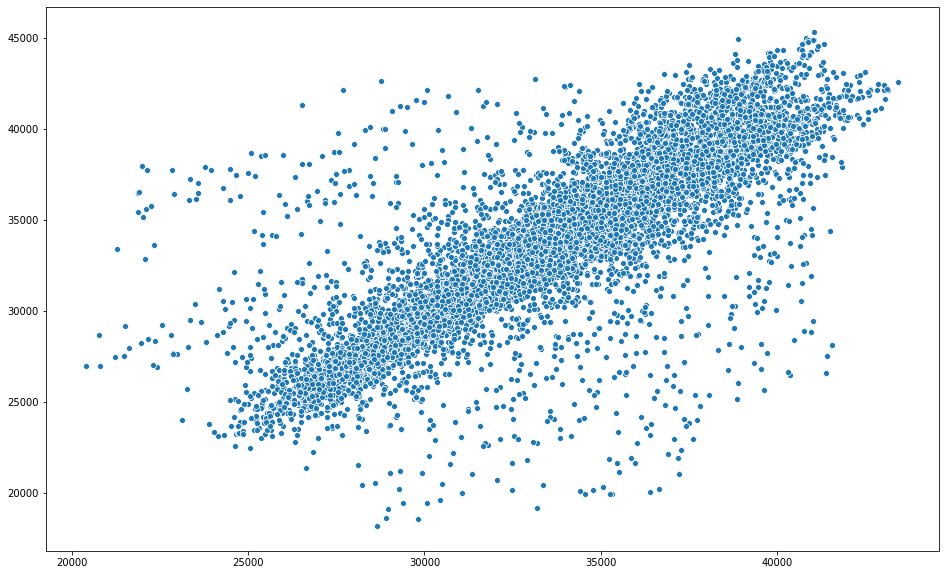

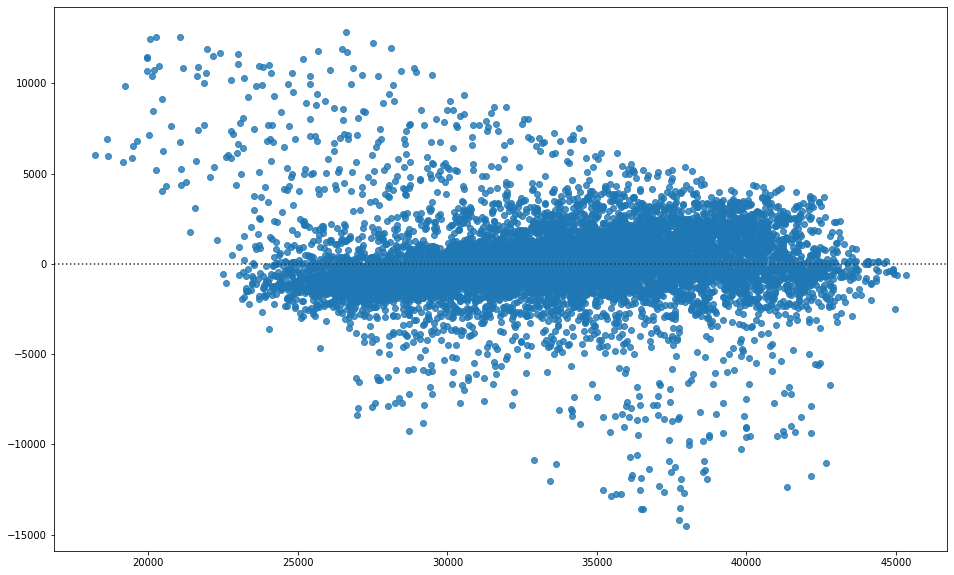

In [48]:
eval_df.append(eval_function("LR_7",valid_df["Consumption"].values,preds.reshape(1,-1)[0]))

## Regression with both 2 and 7 days

In [0]:
cons_lagged=cons_holiday_binary.copy()

In [56]:
cons_lagged["Consumption_2_lag"]=cons_lagged["Consumption"].shift(24*2)
cons_lagged["Consumption_7_lag"]=cons_lagged["Consumption"].shift(24*7)
cons_lagged=cons_lagged.dropna()
cons_lagged

,Date,Hour,Consumption,Datetime,is_annelergunu,is_arife,is_babalargunu,is_cocukbayrami,is_cumhuriyet,is_elections,is_examination,is_genclikbayrami,is_holiday,is_iscibayrami,is_kadinlargunu,is_kandil,is_kurbanbayrami,is_kurbanbayramilkgun,is_kurbanoncesigunler,is_onbestemmuz,is_outlierdays,is_ramazanbayrami,is_ramazanbayramilkgun,is_ramazanbayramisonrasi,is_ramazangunler,is_ramazanilkgun,is_ramazanoncesigunler,is_school_days,is_school_end,is_school_start,is_semester,is_semester_days,is_sevgililergunu,is_single_day_holidays,is_summerTimes,is_summer_break,is_uzunbayram,is_winterTimes,is_winter_break,is_winter_break_schools,is_yilbasi,is_yilbasioncesi,is_zaferbayrami,Consumption_2_lag,Consumption_7_lag
168,07.01.2016,00:00,28763.95,2016-01-07 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29244.38,29590.88
169,07.01.2016,01:00,27284.84,2016-01-07 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27637.23,27785.43
170,07.01.2016,02:00,26321.95,2016-01-07 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26335.78,26516.53
171,07.01.2016,03:00,25748.49,2016-01-07 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25870.23,26091.62
172,07.01.2016,04:00,25636.58,2016-01-07 04:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25975.07,25871.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36571,03.03.2020,19:00,37936.79,2020-03-03 19:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,35049.21,39283.70
36572,03.03.2020,20:00,37553.37,2020-03-03 20:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34901.84,38791.40
36573,03.03.2020,21:00,36581.73,2020-03-03 21:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34225.14,37588.86
36574,03.03.2020,22:00,35434.36,2020-03-03 22:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,33257.06,36290.64


In [0]:
train_df=cons_lagged.loc[cons_lagged["Datetime"]<pd.to_datetime("2019-02-01 00:00:00")]
valid_df=cons_lagged.loc[cons_lagged["Datetime"]>=pd.to_datetime("2019-02-01 00:00:00")]

In [0]:
from sklearn.linear_model import LinearRegression
cons_lagged=cons_lagged.dropna()

model=LinearRegression()
model.fit(train_df[["Consumption_7_lag","Consumption_2_lag"]].values,train_df["Consumption"].values.reshape(-1, 1))
preds=model.predict(valid_df[["Consumption_7_lag","Consumption_2_lag"]].values)

RMSE:  2418.089383711647
RMSLE:  0.0764071026918746
MAE:  1607.188564490527
MAPE:  4.989226864853979


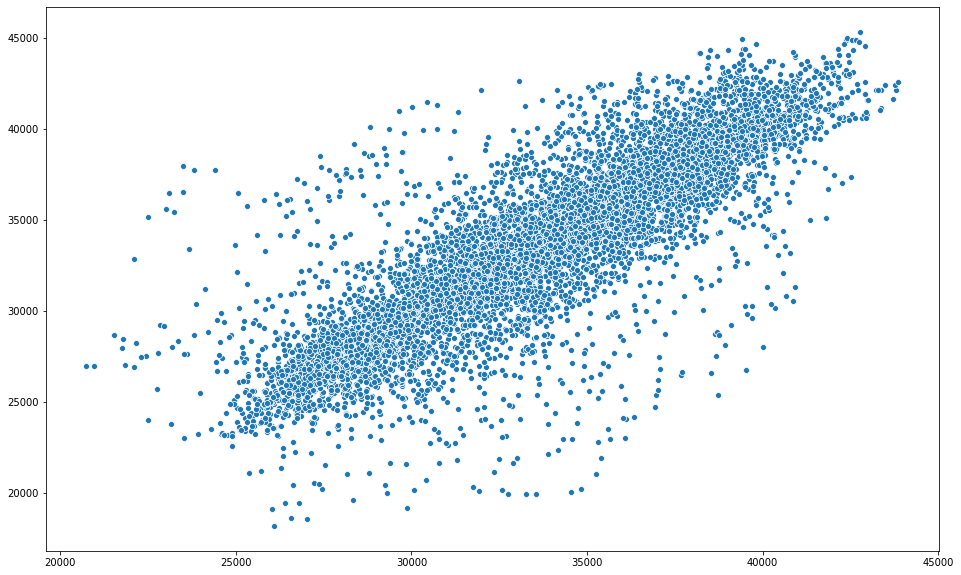

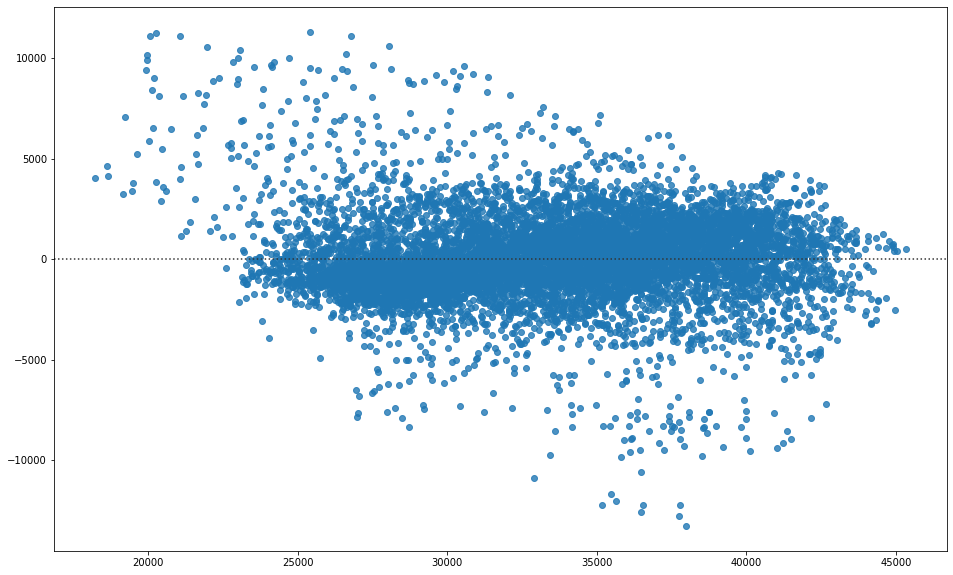

In [59]:
eval_df.append(eval_function("LR_2_7",valid_df["Consumption"].values,preds.reshape(1,-1)[0]))

## LR with dates

In [60]:
cons_lagged=cons_holiday_binary.copy()
cons_lagged["Consumption_2_lag"]=cons_lagged["Consumption"].shift(24*2)
cons_lagged["Consumption_7_lag"]=cons_lagged["Consumption"].shift(24*7)
cons_lagged["Hour"]=cons_lagged["Hour"].apply(lambda x:x.split(":")[0]).astype(int)
cons_lagged["Day"]=cons_lagged["Date"].apply(lambda x:x.split(".")[0]).astype(int)
cons_lagged["Month"]=cons_lagged["Date"].apply(lambda x:x.split(".")[1]).astype(int)
cons_lagged["weekday"]=pd.to_datetime(cons_lagged["Date"]).apply(lambda x: x.weekday()).astype(int)
cons_lagged=cons_lagged.dropna()
cons_lagged

,Date,Hour,Consumption,Datetime,is_annelergunu,is_arife,is_babalargunu,is_cocukbayrami,is_cumhuriyet,is_elections,is_examination,is_genclikbayrami,is_holiday,is_iscibayrami,is_kadinlargunu,is_kandil,is_kurbanbayrami,is_kurbanbayramilkgun,is_kurbanoncesigunler,is_onbestemmuz,is_outlierdays,is_ramazanbayrami,is_ramazanbayramilkgun,is_ramazanbayramisonrasi,is_ramazangunler,is_ramazanilkgun,is_ramazanoncesigunler,is_school_days,is_school_end,is_school_start,is_semester,is_semester_days,is_sevgililergunu,is_single_day_holidays,is_summerTimes,is_summer_break,is_uzunbayram,is_winterTimes,is_winter_break,is_winter_break_schools,is_yilbasi,is_yilbasioncesi,is_zaferbayrami,Consumption_2_lag,Consumption_7_lag,Day,Month,weekday
168,07.01.2016,0,28763.95,2016-01-07 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29244.38,29590.88,7,1,4
169,07.01.2016,1,27284.84,2016-01-07 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27637.23,27785.43,7,1,4
170,07.01.2016,2,26321.95,2016-01-07 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26335.78,26516.53,7,1,4
171,07.01.2016,3,25748.49,2016-01-07 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25870.23,26091.62,7,1,4
172,07.01.2016,4,25636.58,2016-01-07 04:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25975.07,25871.54,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36571,03.03.2020,19,37936.79,2020-03-03 19:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,35049.21,39283.70,3,3,1
36572,03.03.2020,20,37553.37,2020-03-03 20:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34901.84,38791.40,3,3,1
36573,03.03.2020,21,36581.73,2020-03-03 21:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34225.14,37588.86,3,3,1
36574,03.03.2020,22,35434.36,2020-03-03 22:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,33257.06,36290.64,3,3,1


In [0]:
train_df=cons_lagged.loc[cons_lagged["Datetime"]<pd.to_datetime("2019-02-01 00:00:00")]
valid_df=cons_lagged.loc[cons_lagged["Datetime"]>=pd.to_datetime("2019-02-01 00:00:00")]

In [0]:
from sklearn.linear_model import LinearRegression

cons_lagged=cons_lagged.dropna()

cols=train_df.columns.difference(["Date","Consumption","Datetime"]).values

model=LinearRegression()
model.fit(train_df[cols].values,train_df["Consumption"].values.reshape(-1, 1))
preds=model.predict(valid_df[cols].values)

RMSE:  1859.925277731482
RMSLE:  0.057475047629526856
MAE:  1338.6646910382335
MAPE:  4.053236198257791


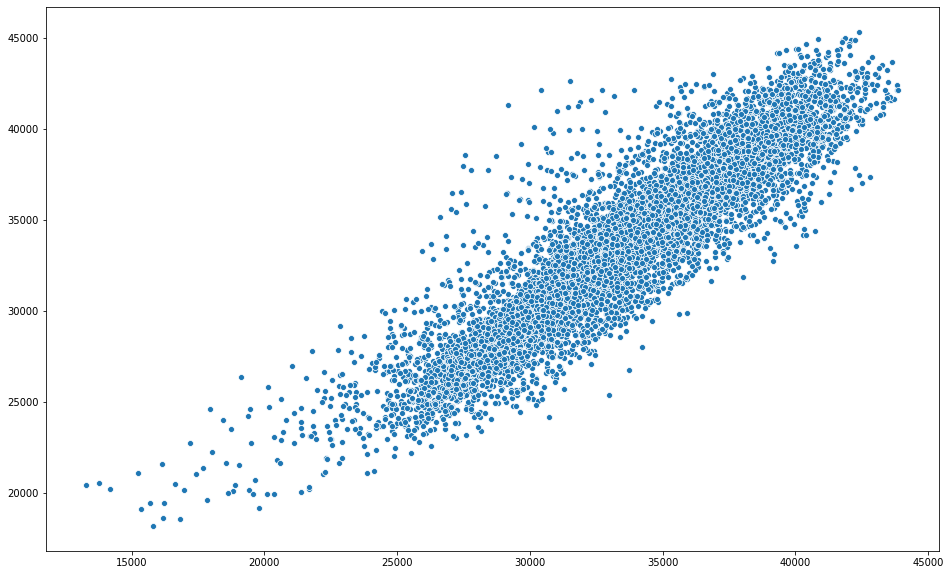

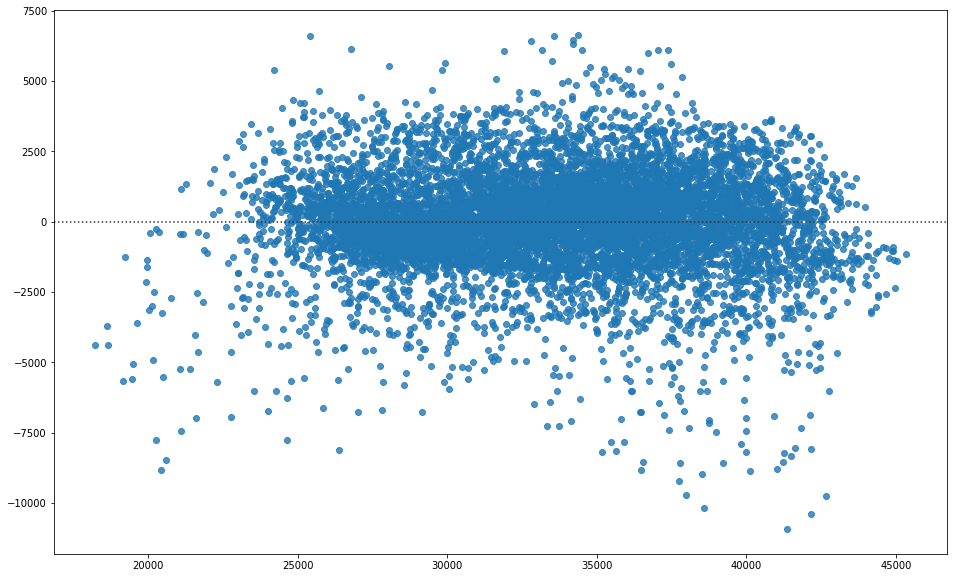

In [64]:
eval_df.append(eval_function("LR_2_7_w_dates",valid_df["Consumption"].values,preds.reshape(1,-1)[0]))



## LR Date categorical


In [65]:
cons_lagged=cons_holiday_binary.copy()
cons_lagged["Consumption_2_lag"]=cons_lagged["Consumption"].shift(24*2)
cons_lagged["Consumption_7_lag"]=cons_lagged["Consumption"].shift(24*7)
cons_lagged["Hour"]=cons_lagged["Hour"].apply(lambda x:x.split(":")[0]).astype(int)
cons_lagged["Day"]=cons_lagged["Date"].apply(lambda x:x.split(".")[0]).astype(int)
cons_lagged["Month"]=cons_lagged["Date"].apply(lambda x:x.split(".")[1]).astype(int)
cons_lagged["weekday"]=pd.to_datetime(cons_lagged["Date"]).apply(lambda x: x.weekday()).astype(int)
cons_lagged=cons_lagged.dropna()
cons_lagged

,Date,Hour,Consumption,Datetime,is_annelergunu,is_arife,is_babalargunu,is_cocukbayrami,is_cumhuriyet,is_elections,is_examination,is_genclikbayrami,is_holiday,is_iscibayrami,is_kadinlargunu,is_kandil,is_kurbanbayrami,is_kurbanbayramilkgun,is_kurbanoncesigunler,is_onbestemmuz,is_outlierdays,is_ramazanbayrami,is_ramazanbayramilkgun,is_ramazanbayramisonrasi,is_ramazangunler,is_ramazanilkgun,is_ramazanoncesigunler,is_school_days,is_school_end,is_school_start,is_semester,is_semester_days,is_sevgililergunu,is_single_day_holidays,is_summerTimes,is_summer_break,is_uzunbayram,is_winterTimes,is_winter_break,is_winter_break_schools,is_yilbasi,is_yilbasioncesi,is_zaferbayrami,Consumption_2_lag,Consumption_7_lag,Day,Month,weekday
168,07.01.2016,0,28763.95,2016-01-07 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29244.38,29590.88,7,1,4
169,07.01.2016,1,27284.84,2016-01-07 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27637.23,27785.43,7,1,4
170,07.01.2016,2,26321.95,2016-01-07 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26335.78,26516.53,7,1,4
171,07.01.2016,3,25748.49,2016-01-07 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25870.23,26091.62,7,1,4
172,07.01.2016,4,25636.58,2016-01-07 04:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25975.07,25871.54,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36571,03.03.2020,19,37936.79,2020-03-03 19:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,35049.21,39283.70,3,3,1
36572,03.03.2020,20,37553.37,2020-03-03 20:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34901.84,38791.40,3,3,1
36573,03.03.2020,21,36581.73,2020-03-03 21:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34225.14,37588.86,3,3,1
36574,03.03.2020,22,35434.36,2020-03-03 22:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,33257.06,36290.64,3,3,1


In [0]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

cat_features=["Hour","Day","Month","weekday"]
linear_enc=OneHotEncoder()
one_hot_encoded=linear_enc.fit_transform(cons_lagged[cat_features]).toarray()
normal_feats=cons_lagged.columns.difference(cat_features).tolist()
cons_lagged=np.hstack([cons_lagged[normal_feats],one_hot_encoded])
cons_lagged=pd.DataFrame(cons_lagged,columns=normal_feats+np.concatenate([[cat_features[i]+"_"+str(j) for j in cats_]for i,cats_ in enumerate(linear_enc.categories_)]).tolist())

In [0]:
train_df=cons_lagged.loc[cons_lagged["Datetime"]<pd.to_datetime("2019-02-01 00:00:00")]
valid_df=cons_lagged.loc[cons_lagged["Datetime"]>=pd.to_datetime("2019-02-01 00:00:00")]

In [0]:
from sklearn.linear_model import LinearRegression

cons_lagged=cons_lagged.dropna()

cols=train_df.columns.difference(["Date","Consumption","Datetime"]).values

model=LinearRegression()
model.fit(train_df[cols].values,train_df["Consumption"].values.reshape(-1, 1))
preds=model.predict(valid_df[cols].values)

In [69]:
eval_df.append(eval_function("LR_2_7_w_dates_cat",valid_df["Consumption"].values,preds.reshape(1,-1)[0]))

ValueError: ignored

## LR Date cyclical

In [70]:
cons_lagged=cons_holiday_binary.copy()
cons_lagged["Consumption_2_lag"]=cons_lagged["Consumption"].shift(24*2)
cons_lagged["Consumption_7_lag"]=cons_lagged["Consumption"].shift(24*7)
cons_lagged["Hour"]=cons_lagged["Hour"].apply(lambda x:x.split(":")[0]).astype(int)
cons_lagged["Day"]=cons_lagged["Date"].apply(lambda x:x.split(".")[0]).astype(int)
cons_lagged["Month"]=cons_lagged["Date"].apply(lambda x:x.split(".")[1]).astype(int)
cons_lagged["weekday"]=pd.to_datetime(cons_lagged["Date"]).apply(lambda x: x.weekday()).astype(int)
cons_lagged=cons_lagged.dropna()
cons_lagged

,Date,Hour,Consumption,Datetime,is_annelergunu,is_arife,is_babalargunu,is_cocukbayrami,is_cumhuriyet,is_elections,is_examination,is_genclikbayrami,is_holiday,is_iscibayrami,is_kadinlargunu,is_kandil,is_kurbanbayrami,is_kurbanbayramilkgun,is_kurbanoncesigunler,is_onbestemmuz,is_outlierdays,is_ramazanbayrami,is_ramazanbayramilkgun,is_ramazanbayramisonrasi,is_ramazangunler,is_ramazanilkgun,is_ramazanoncesigunler,is_school_days,is_school_end,is_school_start,is_semester,is_semester_days,is_sevgililergunu,is_single_day_holidays,is_summerTimes,is_summer_break,is_uzunbayram,is_winterTimes,is_winter_break,is_winter_break_schools,is_yilbasi,is_yilbasioncesi,is_zaferbayrami,Consumption_2_lag,Consumption_7_lag,Day,Month,weekday
168,07.01.2016,0,28763.95,2016-01-07 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29244.38,29590.88,7,1,4
169,07.01.2016,1,27284.84,2016-01-07 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27637.23,27785.43,7,1,4
170,07.01.2016,2,26321.95,2016-01-07 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26335.78,26516.53,7,1,4
171,07.01.2016,3,25748.49,2016-01-07 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25870.23,26091.62,7,1,4
172,07.01.2016,4,25636.58,2016-01-07 04:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25975.07,25871.54,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36571,03.03.2020,19,37936.79,2020-03-03 19:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,35049.21,39283.70,3,3,1
36572,03.03.2020,20,37553.37,2020-03-03 20:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34901.84,38791.40,3,3,1
36573,03.03.2020,21,36581.73,2020-03-03 21:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34225.14,37588.86,3,3,1
36574,03.03.2020,22,35434.36,2020-03-03 22:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,33257.06,36290.64,3,3,1


In [0]:
cons_lagged['Hour_sin'] = np.sin(2 * np.pi * cons_lagged['Hour']/23.0)
cons_lagged['Hour_cos'] = np.cos(2 * np.pi * cons_lagged['Hour']/23.0)

cons_lagged['Day_sin'] = np.sin(2 * np.pi * cons_lagged['Day']/31.0)
cons_lagged['Day_cos'] = np.cos(2 * np.pi * cons_lagged['Day']/31.0)

cons_lagged['Month_sin'] = np.sin(2 * np.pi * cons_lagged['Month']/12.0)
cons_lagged['Month_cos'] = np.cos(2 * np.pi * cons_lagged['Month']/12.0)

cons_lagged['weekday_sin'] = np.sin(2 * np.pi * cons_lagged['weekday']/6.0)
cons_lagged['weekday_cos'] = np.cos(2 * np.pi * cons_lagged['weekday']/6.0)

del cons_lagged['Hour'],cons_lagged['Day'],cons_lagged['Month'],cons_lagged['weekday']

In [0]:
train_df=cons_lagged.loc[cons_lagged["Datetime"]<pd.to_datetime("2019-02-01 00:00:00")]
valid_df=cons_lagged.loc[cons_lagged["Datetime"]>=pd.to_datetime("2019-02-01 00:00:00")]

In [0]:
from sklearn.linear_model import LinearRegression

cons_lagged=cons_lagged.dropna()

cols=train_df.columns.difference(["Date","Consumption","Datetime"]).values

model=LinearRegression()
model.fit(train_df[cols].values,train_df["Consumption"].values.reshape(-1, 1))
preds=model.predict(valid_df[cols].values)

RMSE:  1888.7905145160066
RMSLE:  0.05910535610115323
MAE:  1359.2200840365626
MAPE:  4.118492160975466


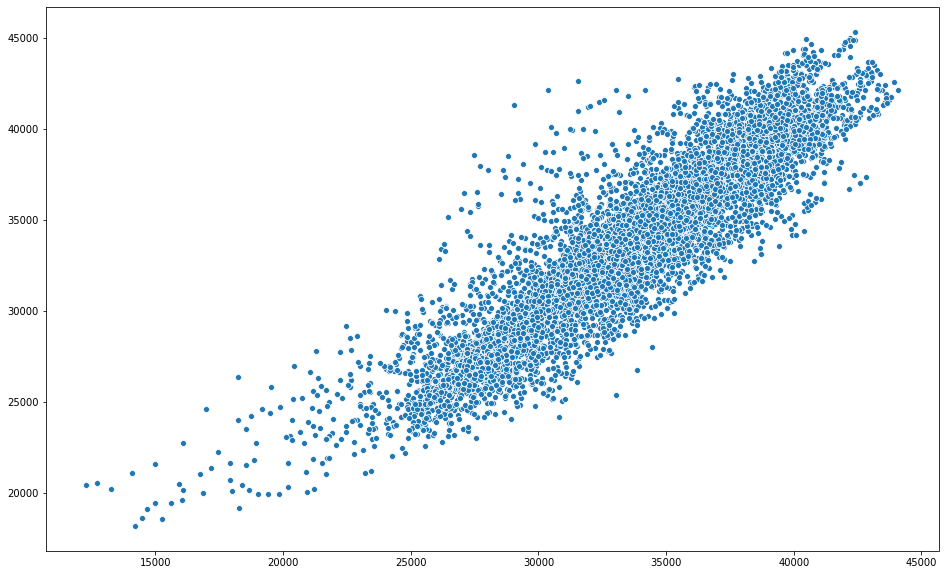

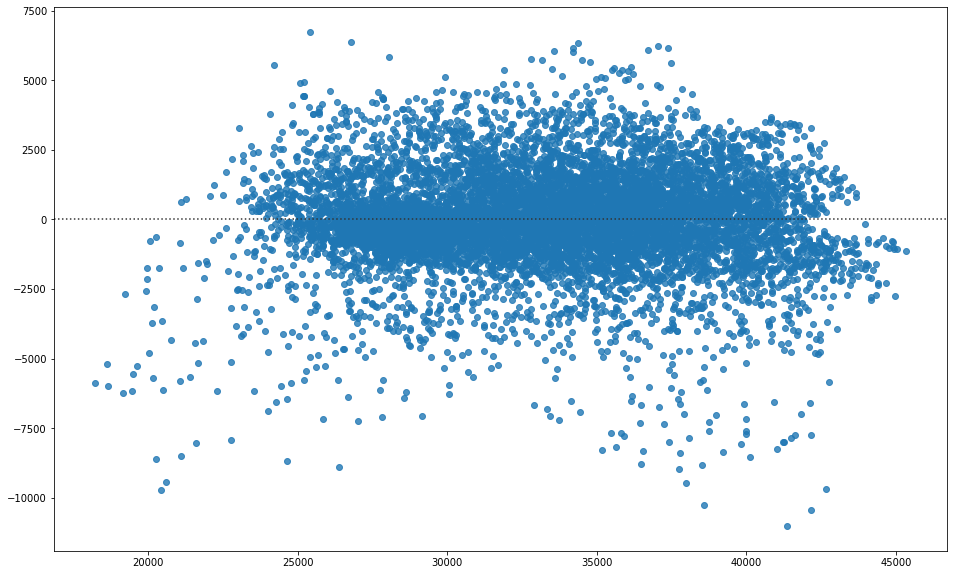

In [74]:
eval_df.append(eval_function("LR_2_7_w_dates_cat_cyl",valid_df["Consumption"].values,preds.reshape(1,-1)[0]))

## Datelar promosyon tipleri koyulacak, sonradan lineer regresyon direkt vermeme gerek yok 

In [0]:
special_days_path="drive/My Drive/colab_datas/IE 492/ozel_gunler/*"
special_day_df=pd.DataFrame()
exception=[]
for i in tqdm(glob.glob(special_days_path)):  
    a=pd.read_csv(i)
    try:
        a["special_day"]=np.full(len(a),a.columns[0])
        a.columns=["date","special_day"]
        special_day_df=pd.concat([special_day_df, a])
    except ValueError:
        exception.append(i)
        pass
special_day_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


,date,special_day
1,2015-10-01,elections
2,2015-07-07,elections
3,2017-04-16,elections
4,2018-06-24,elections
5,2019-03-31,elections
...,...,...
6,2015-08-30,zaferbayrami
7,2016-08-30,zaferbayrami
8,2017-08-30,zaferbayrami
9,2018-08-30,zaferbayrami


In [0]:
special_day_df["is"]=np.ones(len(special_day_df))
special_day_df=pd.pivot_table(special_day_df,index="date",columns="special_day").fillna(0).astype(int)
special_day_df.columns=['_'.join(i) for i in special_day_df.columns]
special_day_df=special_day_df.reset_index()
special_day_df

,date,is_annelergunu,is_arife,is_babalargunu,is_cocukbayrami,is_cumhuriyet,is_elections,is_examination,is_genclikbayrami,is_holiday,is_iscibayrami,is_kadinlargunu,is_kandil,is_kurbanbayrami,is_kurbanbayramilkgun,is_kurbanoncesigunler,is_okulacilisi,is_okulkapanisi,is_onbestemmuz,is_outlierdays,is_ramazanbayrami,is_ramazanbayramilkgun,is_ramazanbayramisonrasi,is_ramazangunler,is_ramazanilkgun,is_ramazanoncesigunler,is_school_days,is_school_end,is_school_start,is_semester,is_semester_days,is_sevgililergunu,is_single_day_holidays,is_summerTimes,is_summer_break,is_uzunbayram,is_winterTimes,is_winter_break,is_yilbasi,is_yilbasioncesi,is_zaferbayrami
0,2010-01-01,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,2010-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2010-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2010-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2010-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,2019-12-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2411,2019-12-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2412,2019-12-29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2413,2019-12-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0




## LR Date categorical and spec days


In [0]:
cons_lagged=consumption_df.copy()
cons_lagged["Consumption_2_lag"]=cons_lagged["Consumption"].shift(24*2)
cons_lagged["Consumption_7_lag"]=cons_lagged["Consumption"].shift(24*7)
cons_lagged["Hour"]=cons_lagged["Hour"].apply(lambda x:x.split(":")[0]).astype(int)
cons_lagged["Day"]=cons_lagged["Date"].apply(lambda x:x.split(".")[0]).astype(int)
cons_lagged["Month"]=cons_lagged["Date"].apply(lambda x:x.split(".")[1]).astype(int)
cons_lagged["weekday"]=pd.to_datetime(cons_lagged["Date"]).apply(lambda x: x.weekday()).astype(int)
cons_lagged=cons_lagged.dropna()
cons_lagged

,Date,Hour,Consumption,Datetime,Consumption_2_lag,Consumption_7_lag,Day,Month,weekday
168,07.01.2016,0,28763.95,2016-07-01 00:00:00,29244.38,29590.88,7,1,4
169,07.01.2016,1,27284.84,2016-07-01 01:00:00,27637.23,27785.43,7,1,4
170,07.01.2016,2,26321.95,2016-07-01 02:00:00,26335.78,26516.53,7,1,4
171,07.01.2016,3,25748.49,2016-07-01 03:00:00,25870.23,26091.62,7,1,4
172,07.01.2016,4,25636.58,2016-07-01 04:00:00,25975.07,25871.54,7,1,4
...,...,...,...,...,...,...,...,...,...
36571,03.03.2020,19,37936.79,2020-03-03 19:00:00,35049.21,39283.70,3,3,1
36572,03.03.2020,20,37553.37,2020-03-03 20:00:00,34901.84,38791.40,3,3,1
36573,03.03.2020,21,36581.73,2020-03-03 21:00:00,34225.14,37588.86,3,3,1
36574,03.03.2020,22,35434.36,2020-03-03 22:00:00,33257.06,36290.64,3,3,1


In [0]:
special_day_df["date"]=pd.to_datetime(special_day_df["date"])
special_day_df["date"].dtype

dtype('<M8[ns]')

In [0]:
cons_lagged=pd.merge(cons_lagged,special_day_df,left_on="Datetime",right_on="date",how="left").drop(columns="date").fillna(0)
cons_lagged

,Date,Hour,Consumption,Datetime,Consumption_2_lag,Consumption_7_lag,Day,Month,weekday,is_annelergunu,is_arife,is_babalargunu,is_cocukbayrami,is_cumhuriyet,is_elections,is_examination,is_genclikbayrami,is_holiday,is_iscibayrami,is_kadinlargunu,is_kandil,is_kurbanbayrami,is_kurbanbayramilkgun,is_kurbanoncesigunler,is_okulacilisi,is_okulkapanisi,is_onbestemmuz,is_outlierdays,is_ramazanbayrami,is_ramazanbayramilkgun,is_ramazanbayramisonrasi,is_ramazangunler,is_ramazanilkgun,is_ramazanoncesigunler,is_school_days,is_school_end,is_school_start,is_semester,is_semester_days,is_sevgililergunu,is_single_day_holidays,is_summerTimes,is_summer_break,is_uzunbayram,is_winterTimes,is_winter_break,is_yilbasi,is_yilbasioncesi,is_zaferbayrami
0,07.01.2016,0,28763.95,2016-07-01 00:00:00,29244.38,29590.88,7,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,07.01.2016,1,27284.84,2016-07-01 01:00:00,27637.23,27785.43,7,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,07.01.2016,2,26321.95,2016-07-01 02:00:00,26335.78,26516.53,7,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,07.01.2016,3,25748.49,2016-07-01 03:00:00,25870.23,26091.62,7,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,07.01.2016,4,25636.58,2016-07-01 04:00:00,25975.07,25871.54,7,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35971,03.03.2020,19,37936.79,2020-03-03 19:00:00,35049.21,39283.70,3,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35972,03.03.2020,20,37553.37,2020-03-03 20:00:00,34901.84,38791.40,3,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35973,03.03.2020,21,36581.73,2020-03-03 21:00:00,34225.14,37588.86,3,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35974,03.03.2020,22,35434.36,2020-03-03 22:00:00,33257.06,36290.64,3,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

cat_features=["Hour","Day","Month","weekday"]
linear_enc=OneHotEncoder()
one_hot_encoded=linear_enc.fit_transform(cons_lagged[cat_features]).toarray()
normal_feats=cons_lagged.columns.difference(cat_features).tolist()
cons_lagged=np.hstack([cons_lagged[normal_feats],one_hot_encoded])
cons_lagged=pd.DataFrame(cons_lagged,columns=normal_feats+np.concatenate([[cat_features[i]+"_"+str(j) for j in cats_]for i,cats_ in enumerate(linear_enc.categories_)]).tolist())

In [0]:
cons_lagged

,Consumption,Consumption_2_lag,Consumption_7_lag,Date,Datetime,is_annelergunu,is_arife,is_babalargunu,is_cocukbayrami,is_cumhuriyet,is_elections,is_examination,is_genclikbayrami,is_holiday,is_iscibayrami,is_kadinlargunu,is_kandil,is_kurbanbayrami,is_kurbanbayramilkgun,is_kurbanoncesigunler,is_okulacilisi,is_okulkapanisi,is_onbestemmuz,is_outlierdays,is_ramazanbayrami,is_ramazanbayramilkgun,is_ramazanbayramisonrasi,is_ramazangunler,is_ramazanilkgun,is_ramazanoncesigunler,is_school_days,is_school_end,is_school_start,is_semester,is_semester_days,is_sevgililergunu,is_single_day_holidays,is_summerTimes,is_summer_break,is_uzunbayram,...,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,28764,29244.4,29590.9,07.01.2016,2016-07-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,27284.8,27637.2,27785.4,07.01.2016,2016-07-01 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,26322,26335.8,26516.5,07.01.2016,2016-07-01 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,25748.5,25870.2,26091.6,07.01.2016,2016-07-01 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,25636.6,25975.1,25871.5,07.01.2016,2016-07-01 04:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35971,37936.8,35049.2,39283.7,03.03.2020,2020-03-03 19:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
35972,37553.4,34901.8,38791.4,03.03.2020,2020-03-03 20:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
35973,36581.7,34225.1,37588.9,03.03.2020,2020-03-03 21:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
35974,35434.4,33257.1,36290.6,03.03.2020,2020-03-03 22:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [0]:
train_df=cons_lagged.loc[cons_lagged["Datetime"]<=pd.to_datetime("2019-03-03 23:00:00")]
valid_df=cons_lagged.loc[cons_lagged["Datetime"]>pd.to_datetime("2019-03-03 23:00:00")]

In [0]:
sp_days_index=[i for i,col in enumerate(train_df[cols].columns) if col.startswith("is_")]

In [0]:
from sklearn.linear_model import LinearRegression

cons_lagged=cons_lagged.dropna()

cols=train_df.columns.difference(["Date","Consumption","Datetime"]).values

model=LinearRegression()
model.fit(train_df[cols].values,train_df["Consumption"].values.reshape(-1, 1))
preds=model.predict(valid_df[cols].values)

In [0]:
eval_df.append(eval_function("LR_2_7_w_dates",valid_df["Consumption"],preds))

RMSE:  2412.74622328101
RMSLE:  0.07634896064818732
MAE:  1592.7063299341169


In [0]:
sum(model.coef_[0][sp_days_index].tolist())

9285.206128964073